In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)
df.head(5)

C:\Users\ARPIT AWASTHI\AppData\Local\Temp\ipykernel_18784\598029417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ARPIT AWASTHI\AppData\Local\Temp\ipykernel_18784\598029417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
print("\n--- Categorical Value Counts ---")
for col in ['Survived', 'Sex', 'Embarked', 'Pclass']:
    print(f"\n{col}:\n", df[col].value_counts())


--- Categorical Value Counts ---

Survived:
 Survived
0    549
1    342
Name: count, dtype: int64

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [8]:
print("\n--- Survival Rate by Gender ---")
print(df.groupby('Sex')['Survived'].mean())



--- Survival Rate by Gender ---
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [9]:
print("\n--- Survival Rate by Pclass ---")
print(df.groupby('Pclass')['Survived'].mean())



--- Survival Rate by Pclass ---
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [10]:
print("\n--- Survival Rate by Embarked ---")
print(df.groupby('Embarked')['Survived'].mean())


--- Survival Rate by Embarked ---
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [11]:
print("\n--- Survival Rate by Age Group ---")
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])
print(df.groupby('AgeGroup')['Survived'].mean())


--- Survival Rate by Age Group ---
AgeGroup
Child      0.579710
Teen       0.381818
Adult      0.364769
Mid-Age    0.390625
Senior     0.227273
Name: Survived, dtype: float64


C:\Users\ARPIT AWASTHI\AppData\Local\Temp\ipykernel_18784\2634346553.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


In [12]:
sns.set(style="whitegrid")

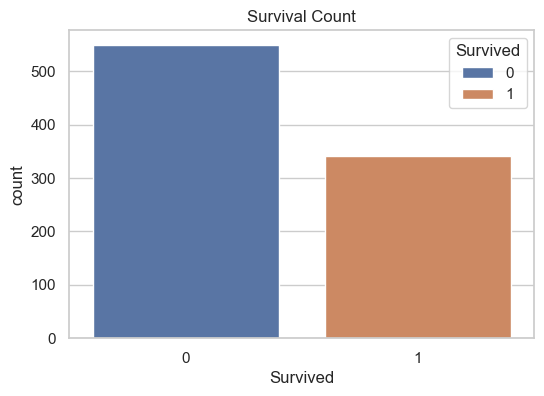

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df,hue="Survived")
plt.title("Survival Count")
plt.show()

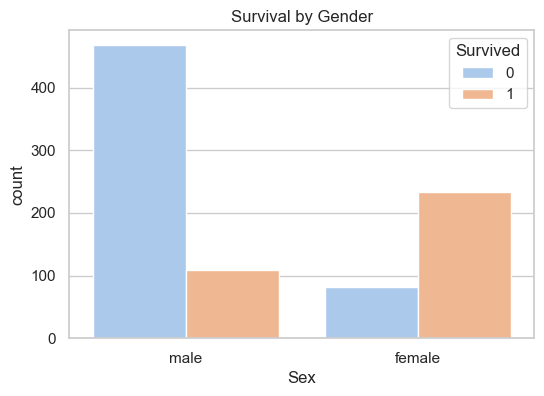

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title("Survival by Gender")
plt.show()

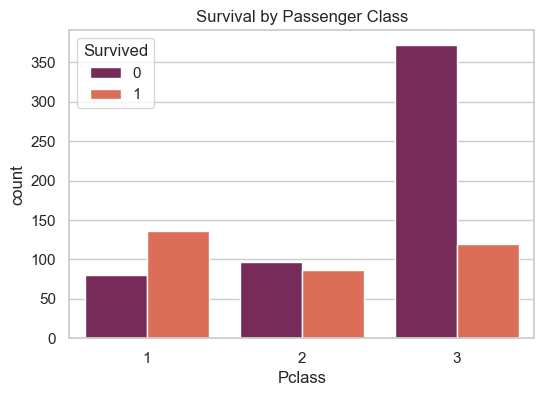

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='rocket')
plt.title("Survival by Passenger Class")
plt.show()

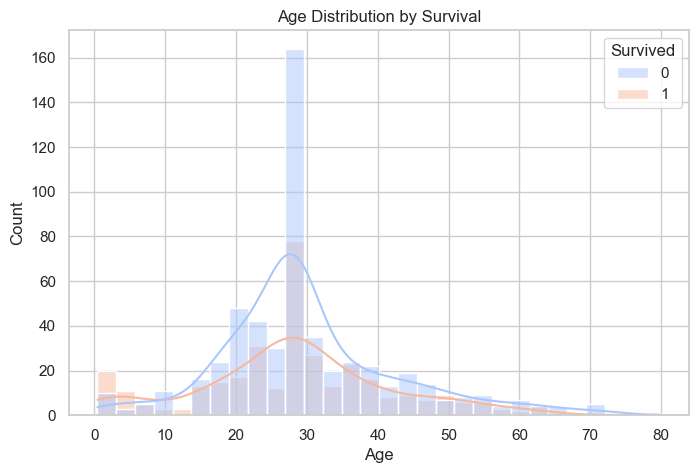

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='coolwarm')
plt.title("Age Distribution by Survival")
plt.show()

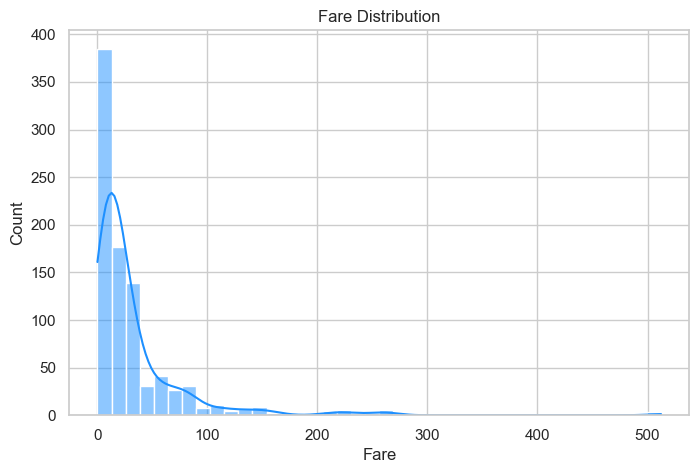

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Fare', bins=40, kde=True, color='dodgerblue')
plt.title("Fare Distribution")
plt.show()


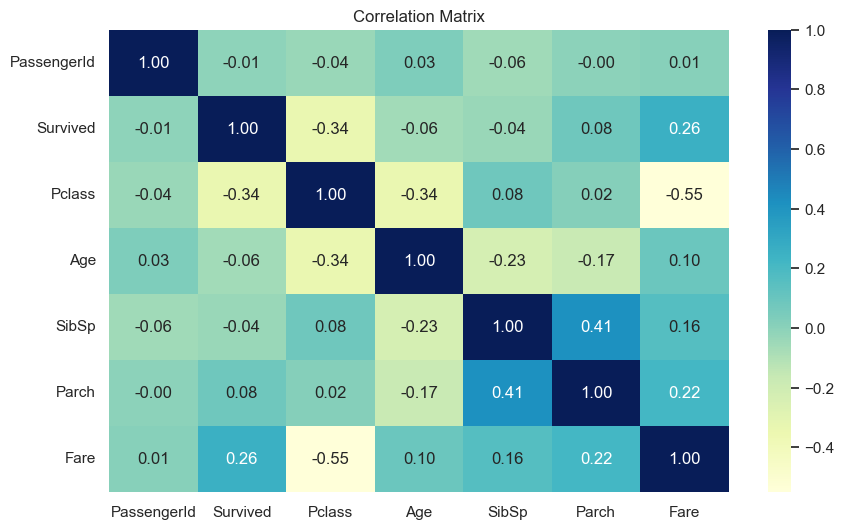

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()